<a href="https://colab.research.google.com/github/he-yilan/COVID19_HousholdSizeModeling/blob/master/SIR_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
!pip install mpld3
import mpld3
mpld3.enable_notebook()

     |████████████████████████████████| 1.0MB 2.7MB/s 
  Created wheel for mpld3: filename=mpld3-0.5.1-cp36-none-any.whl size=364064 sha256=f07c2b0e5aa6086d4b046ebc5f3537085084cd685f613aa382910a3b907dd609
  Stored in directory: /root/.cache/pip/wheels/38/68/06/d119af6c3f9a2d1e123c1f72d276576b457131b3a7bf94e402
Successfully built mpld3


In [ ]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [ ]:
N = 328239523
D = 7 
beta = 1.15 / D # r0 of 1.15/7 days
gamma = 1.0 / D

S0, I0, R0 = 325598897, 2640626, 1282378  # initial conditions: july 1st; R = recovered + dead

In [ ]:
t = np.linspace(0, 20, 21) # Grid of time points (in days)
y0 = S0, I0, R0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T 

In [ ]:
infectionData = []

for i in range(21):
  infectionData.insert(i, int(round(I[i])))  
print(infectionData)

[2640626, 2693966, 2747781, 2802044, 2856729, 2911806, 2967245, 3023014, 3079079, 3135406, 3191957, 3248694, 3305578, 3362567, 3419619, 3476689, 3533732, 3590702, 3647549, 3704225, 3760679]


In [ ]:
def plotsir(t, S, I, R):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, I, 'y', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')

  ax.set_xlabel('Time (days)')
  ax.set_ylabel('Population')
  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.show();

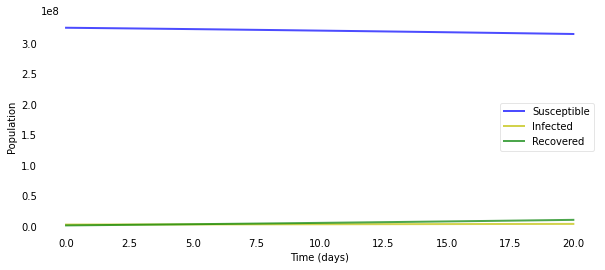

In [ ]:
plotsir(t, S, I, R)

In [ ]:
from numpy import savetxt
savetxt('SIR21S.csv', S, delimiter=',')
savetxt('SIR21I.csv', I, delimiter=',')
savetxt('SIR21R.csv', R, delimiter=',')